In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
class Pretrain(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

In [3]:
class FF(nn.Module):
    def __init__(self, model):
        super().__init__()
        
        self.cnn = model
        
        self.fc = nn.Linear(20, 1)
        
    def forward(self, x):
        x1 = x[:,:1,:]
        x2 = x[:,1:2,:]
        

        x1 = self.cnn(x1)
        x2 = self.cnn(x2)
            
        x = self.fc(torch.cat((x1, x2), dim=1))
        
        return x

In [4]:
model = Pretrain()

In [5]:
from dataloading import load_data

In [6]:
trainloader, testloader = load_data()

In [7]:
learning_rate = .001

criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(baseline.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
epochs = 10

In [9]:
losses = []

for epoch in range(epochs):
    running_loss = 0.0
    epoch_losses = []
    
    for i, data in enumerate(trainloader, 0):
        inputs, target, classes = data
        
        x1 = inputs[:,:1,:]
        x2 = inputs[:,1:2,:]
        
        optimizer.zero_grad()
        
        outputs = model(x1)
        outputs = outputs
        
        loss = criterion(outputs, classes[:,0])
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        epoch_losses.append(loss.item())
    
    epoch_loss = torch.mean(torch.tensor(epoch_losses))
    print(f'epoch: {epoch}, loss: {epoch_loss}')
    losses.append(epoch_loss)  

epoch: 0, loss: 3.6783299446105957
epoch: 1, loss: 0.6733487844467163
epoch: 2, loss: 0.37268272042274475
epoch: 3, loss: 0.23257750272750854
epoch: 4, loss: 0.1525152027606964
epoch: 5, loss: 0.09774131327867508
epoch: 6, loss: 0.06716795265674591
epoch: 7, loss: 0.042119208723306656
epoch: 8, loss: 0.023027298972010612
epoch: 9, loss: 0.014573900029063225


In [10]:
ff = FF(model)

In [11]:
learning_rate = .001

criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.SGD(baseline.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(ff.parameters(), lr=learning_rate)

In [12]:
losses = []

for epoch in range(epochs):
    running_loss = 0.0
    epoch_losses = []
    
    for i, data in enumerate(trainloader, 0):
        inputs, target, classes = data
        
        optimizer.zero_grad()
        
        outputs = ff(inputs)
        outputs = outputs.squeeze()
        
        loss = criterion(outputs, target.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        epoch_losses.append(loss.item())
    
    epoch_loss = torch.mean(torch.tensor(epoch_losses))
    print(f'epoch: {epoch}, loss: {epoch_loss}')
    losses.append(epoch_loss)  

epoch: 0, loss: 0.540629506111145
epoch: 1, loss: 0.3235015273094177
epoch: 2, loss: 0.23180849850177765
epoch: 3, loss: 0.1997012197971344
epoch: 4, loss: 0.16529381275177002
epoch: 5, loss: 0.1591525673866272
epoch: 6, loss: 0.11179600656032562
epoch: 7, loss: 0.06468727439641953
epoch: 8, loss: 0.04225831851363182
epoch: 9, loss: 0.02433367632329464


In [13]:
from evaluate import evaluate_model

evaluate_model(ff, testloader)

Accuracy: 0.8830000162124634


tensor(0.8830)

In [14]:
from evaluate import evaluate_model

l = []
a = []

epochs = 30

for round in range(20):
    print('####################################################')
    print(f'Round: {round}')
    print('####################################################')
    
    learning_rate = .001
    
    trainloader, testloader = load_data()
    
    
    model = Pretrain()
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    
    for epoch in range(10):
        running_loss = 0.0
        epoch_losses = []

        for i, data in enumerate(trainloader, 0):
            inputs, target, classes = data

            x1 = inputs[:,:1,:]
            x2 = inputs[:,1:2,:]

            optimizer.zero_grad()

            outputs = model(x1)
            outputs = outputs

            loss = criterion(outputs, classes[:,0])
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            epoch_losses.append(loss.item())

    
    model = FF(model)

    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    losses = []
    accs = []

    for epoch in range(epochs):
        running_loss = 0.0
        epoch_losses = []

        for i, data in enumerate(trainloader, 0):
            inputs, target, classes = data
        
            optimizer.zero_grad()

            outputs = model(inputs)
            outputs = outputs.squeeze()

            loss = criterion(outputs, target.float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            epoch_losses.append(loss.item())

        epoch_loss = torch.mean(torch.tensor(epoch_losses))
        print(f'epoch: {epoch}, loss: {epoch_loss}')
        losses.append(epoch_loss) 
        
        acc = evaluate_model(model, testloader)
        accs.append(acc)
    
    l.append(losses)
    a.append(accs)

####################################################
Round: 0
####################################################
epoch: 0, loss: 0.6200920343399048
Accuracy: 0.7770000100135803
epoch: 1, loss: 0.36572083830833435
Accuracy: 0.8059999942779541
epoch: 2, loss: 0.30240780115127563
Accuracy: 0.8109999895095825
epoch: 3, loss: 0.24905598163604736
Accuracy: 0.828000009059906
epoch: 4, loss: 0.20890814065933228
Accuracy: 0.8080000281333923
epoch: 5, loss: 0.1736847162246704
Accuracy: 0.8289999961853027
epoch: 6, loss: 0.13458499312400818
Accuracy: 0.8309999704360962
epoch: 7, loss: 0.12436146289110184
Accuracy: 0.8299999833106995
epoch: 8, loss: 0.0915253683924675
Accuracy: 0.8130000233650208
epoch: 9, loss: 0.07186441123485565
Accuracy: 0.8199999928474426
epoch: 10, loss: 0.0750814750790596
Accuracy: 0.828000009059906
epoch: 11, loss: 0.04994158446788788
Accuracy: 0.8370000123977661
epoch: 12, loss: 0.03970174491405487
Accuracy: 0.8230000138282776
epoch: 13, loss: 0.023227399215102196
Accur

Accuracy: 0.8560000061988831
epoch: 27, loss: 0.00019642226106952876
Accuracy: 0.8569999933242798
epoch: 28, loss: 0.0001817804150050506
Accuracy: 0.8550000190734863
epoch: 29, loss: 0.000169051083503291
Accuracy: 0.8569999933242798
####################################################
Round: 4
####################################################
epoch: 0, loss: 0.6755190491676331
Accuracy: 0.7850000262260437
epoch: 1, loss: 0.3290153443813324
Accuracy: 0.8050000071525574
epoch: 2, loss: 0.26857805252075195
Accuracy: 0.8289999961853027
epoch: 3, loss: 0.20500972867012024
Accuracy: 0.8220000267028809
epoch: 4, loss: 0.137859508395195
Accuracy: 0.8220000267028809
epoch: 5, loss: 0.10089468955993652
Accuracy: 0.8240000009536743
epoch: 6, loss: 0.06855621933937073
Accuracy: 0.8180000185966492
epoch: 7, loss: 0.048106346279382706
Accuracy: 0.8270000219345093
epoch: 8, loss: 0.02089710347354412
Accuracy: 0.8349999785423279
epoch: 9, loss: 0.013300122693181038
Accuracy: 0.8270000219345093
epoc

Accuracy: 0.8579999804496765
epoch: 23, loss: 0.00024394890351686627
Accuracy: 0.8600000143051147
epoch: 24, loss: 0.0002250967372674495
Accuracy: 0.859000027179718
epoch: 25, loss: 0.00020702141046058387
Accuracy: 0.8600000143051147
epoch: 26, loss: 0.00019737789989449084
Accuracy: 0.859000027179718
epoch: 27, loss: 0.00018703157547861338
Accuracy: 0.8600000143051147
epoch: 28, loss: 0.00017604991444386542
Accuracy: 0.8610000014305115
epoch: 29, loss: 0.00015499183791689575
Accuracy: 0.859000027179718
####################################################
Round: 8
####################################################
epoch: 0, loss: 0.5554306507110596
Accuracy: 0.824999988079071
epoch: 1, loss: 0.3394210934638977
Accuracy: 0.8429999947547913
epoch: 2, loss: 0.23719240725040436
Accuracy: 0.8519999980926514
epoch: 3, loss: 0.1763870120048523
Accuracy: 0.8489999771118164
epoch: 4, loss: 0.13480831682682037
Accuracy: 0.8389999866485596
epoch: 5, loss: 0.17547471821308136
Accuracy: 0.86299997

Accuracy: 0.8500000238418579
epoch: 19, loss: 0.0009191058343276381
Accuracy: 0.8489999771118164
epoch: 20, loss: 0.0007903255173005164
Accuracy: 0.8500000238418579
epoch: 21, loss: 0.0007147197029553354
Accuracy: 0.8500000238418579
epoch: 22, loss: 0.0006286448333412409
Accuracy: 0.8500000238418579
epoch: 23, loss: 0.00058670126600191
Accuracy: 0.8500000238418579
epoch: 24, loss: 0.0005175311816856265
Accuracy: 0.8500000238418579
epoch: 25, loss: 0.00046545383520424366
Accuracy: 0.8510000109672546
epoch: 26, loss: 0.00042217489681206644
Accuracy: 0.8519999980926514
epoch: 27, loss: 0.00040685752173885703
Accuracy: 0.8489999771118164
epoch: 28, loss: 0.0003713207843247801
Accuracy: 0.8510000109672546
epoch: 29, loss: 0.0003435467660892755
Accuracy: 0.8510000109672546
####################################################
Round: 12
####################################################
epoch: 0, loss: 0.5624110698699951
Accuracy: 0.8069999814033508
epoch: 1, loss: 0.3194311857223511
Accurac

Accuracy: 0.8489999771118164
epoch: 15, loss: 0.013593224808573723
Accuracy: 0.8460000157356262
epoch: 16, loss: 0.04756728187203407
Accuracy: 0.8370000123977661
epoch: 17, loss: 0.10374336689710617
Accuracy: 0.8629999756813049
epoch: 18, loss: 0.07033669948577881
Accuracy: 0.8539999723434448
epoch: 19, loss: 0.028726467862725258
Accuracy: 0.8569999933242798
epoch: 20, loss: 0.015852799639105797
Accuracy: 0.8550000190734863
epoch: 21, loss: 0.003971113823354244
Accuracy: 0.8600000143051147
epoch: 22, loss: 0.0015839145053178072
Accuracy: 0.8679999709129333
epoch: 23, loss: 0.0006207076366990805
Accuracy: 0.8600000143051147
epoch: 24, loss: 0.00034343841252848506
Accuracy: 0.8629999756813049
epoch: 25, loss: 0.00028538922197185457
Accuracy: 0.8640000224113464
epoch: 26, loss: 0.0002425206475891173
Accuracy: 0.8619999885559082
epoch: 27, loss: 0.0002184495679102838
Accuracy: 0.8640000224113464
epoch: 28, loss: 0.00020723495981656015
Accuracy: 0.8640000224113464
epoch: 29, loss: 0.0001798

Accuracy: 0.8370000123977661
epoch: 11, loss: 0.03337344154715538
Accuracy: 0.8330000042915344
epoch: 12, loss: 0.03175477311015129
Accuracy: 0.843999981880188
epoch: 13, loss: 0.033207859843969345
Accuracy: 0.8489999771118164
epoch: 14, loss: 0.023936359211802483
Accuracy: 0.8389999866485596
epoch: 15, loss: 0.013744521886110306
Accuracy: 0.859000027179718
epoch: 16, loss: 0.008408506400883198
Accuracy: 0.8460000157356262
epoch: 17, loss: 0.005446210503578186
Accuracy: 0.8460000157356262
epoch: 18, loss: 0.0027587965596467257
Accuracy: 0.8410000205039978
epoch: 19, loss: 0.0011544240405783057
Accuracy: 0.843999981880188
epoch: 20, loss: 0.0005868119769729674
Accuracy: 0.847000002861023
epoch: 21, loss: 0.0004314506077207625
Accuracy: 0.8460000157356262
epoch: 22, loss: 0.00035195722011849284
Accuracy: 0.8429999947547913
epoch: 23, loss: 0.0003118828753940761
Accuracy: 0.8429999947547913
epoch: 24, loss: 0.00027975195553153753
Accuracy: 0.843999981880188
epoch: 25, loss: 0.000250451092

In [15]:
aa = torch.tensor(a)

max_a, _ = torch.max(aa, dim=-1)

i = torch.argmax(max_a)

maxmax_a = torch.max(max_a)
min_a = torch.min(max_a)
std_a = torch.std(max_a)

print(min_a, maxmax_a, std_a)

tensor(0.8410) tensor(0.8770) tensor(0.0098)


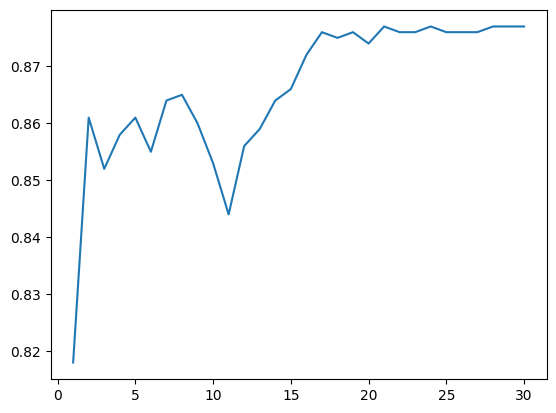

In [16]:
import matplotlib.pyplot as plt

x = range(1, 31)
y = a[i]

plt.plot(x, y)
plt.show()

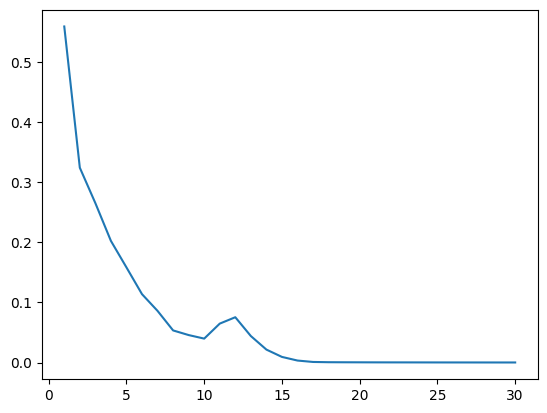

In [17]:
import matplotlib.pyplot as plt

x = range(1, 31)
y = l[i]

plt.plot(x, y)
plt.show()

In [18]:
print(torch.tensor(a[i]).tolist())
print(torch.tensor(l[i]).tolist())

[0.8180000185966492, 0.8610000014305115, 0.8519999980926514, 0.8579999804496765, 0.8610000014305115, 0.8550000190734863, 0.8640000224113464, 0.8650000095367432, 0.8600000143051147, 0.8529999852180481, 0.843999981880188, 0.8560000061988831, 0.859000027179718, 0.8640000224113464, 0.8659999966621399, 0.871999979019165, 0.8759999871253967, 0.875, 0.8759999871253967, 0.8740000128746033, 0.8769999742507935, 0.8759999871253967, 0.8759999871253967, 0.8769999742507935, 0.8759999871253967, 0.8759999871253967, 0.8759999871253967, 0.8769999742507935, 0.8769999742507935, 0.8769999742507935]
[0.5588619112968445, 0.32403141260147095, 0.265130877494812, 0.20231914520263672, 0.15821322798728943, 0.1137370839715004, 0.08593101054430008, 0.05344120040535927, 0.045734018087387085, 0.03984503448009491, 0.06477320194244385, 0.07540128380060196, 0.044110048562288284, 0.021596547216176987, 0.009403386153280735, 0.003361862152814865, 0.00101635477039963, 0.0005993728409521282, 0.0004888782277703285, 0.00042257